<a href="https://colab.research.google.com/github/tshadat2002/data_analytics_2/blob/main/Python/Unit4Assignments/Unit_4_ML_KNN_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.
## Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X ,capital X (designating matrix)

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
load_boston()	Load and return the boston house-prices dataset (regression).
load_iris()	Load and return the iris dataset (classification).
load_diabetes()	Load and return the diabetes dataset (regression).

Example of 21 Pandas operations on data files 

https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# printing colums ,we noticed we have empty 'Unnamed: 0' columns,we will drop it 
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  
#inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated.
#When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
ad_data = df

In [9]:
print (ad_data) 

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


In [10]:
# Ploting few of data features we see how the data in not standart  
from sklearn.preprocessing import StandardScaler
# StandardScaler It basically helps to normalise the data within a particular range (to be around mean=0,std=1). 
# Sometimes, it also helps in speeding up the calculations in an algorithm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

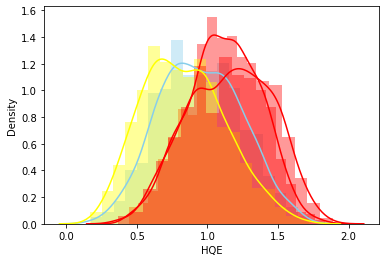

In [11]:

sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")



#Standardization and Normalization of data

https://benalexkeen.com/feature-scaling-with-scikit-learn/

 Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization or standardization. 

There are 4 types of scaling in sicikit

 StandardScaler, MinMaxScaler, RobustScaler, Normalizer
Two most common used is Normalization (help to scale your features 0 to 1 ) and (standarization , Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1) 

we are standardizing the data now   


 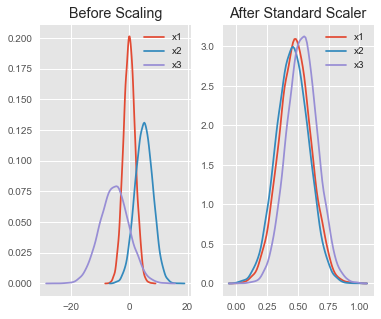


In [13]:
# Using StandardScaler library
from sklearn.preprocessing import StandardScaler

In [14]:
# define scaler
scalar = StandardScaler()

In [15]:
#fit() calculates the parameters (𝜇,std,var) when StandardScaler used

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
# transform data
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
# apply dataframe on all columns of scaled data
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [18]:
X = df.drop('TARGET CLASS',axis=1).values


In [19]:

# we can see now the scaled values
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

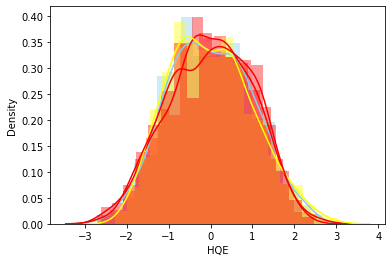

In [20]:
# after scaling let's compare the columns 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## scikit-learn 4-step modeling pattern


Step 1 train and test your model
Import the library


With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test
Now

1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression



In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [24]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

print ("y_test: ", y_test)

X_train:  [[-0.52653536  0.05017368  1.6668444  ...  1.39930754 -1.87221876
  -0.57150221]
 [ 1.58686386 -0.5456054  -0.11432853 ... -0.67261826  0.09793022
   2.18142545]
 [-0.10330566 -0.20081511 -0.08446412 ... -1.30236649  2.13627161
  -2.36287149]
 ...
 [-1.18367742 -0.25233995 -0.86231724 ...  0.55629886 -2.0013446
  -0.39517101]
 [ 1.24662537 -0.39597333  0.33112568 ... -0.88036405  1.10123968
   0.25425196]
 [ 1.93751548  0.66050691 -0.46014431 ...  0.8829405   0.15408261
   0.28879492]]
y_train:  563    0
873    1
904    1
950    0
825    1
      ..
921    0
973    0
834    0
598    1
144    1
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  685    0
612    0
575    0
941    1
851    0
      ..
258    1
809    1
290    0
410    1
654    0
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [25]:
from sklearn.neighbors import  KNeighborsClassifier

In [26]:
# The value K passesd ,n_neighbors=1,means K=1
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
predict = knn.predict(X_test)

In [29]:
#predict

predict 

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [30]:
#  classification_report, confusion_matrix objects within sklearn.metrics 
from sklearn.metrics import  classification_report, confusion_matrix

In [31]:
#A Confusion matrix is an M x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted
print(confusion_matrix(y_test,predict))

[[138  13]
 [ 15 134]]


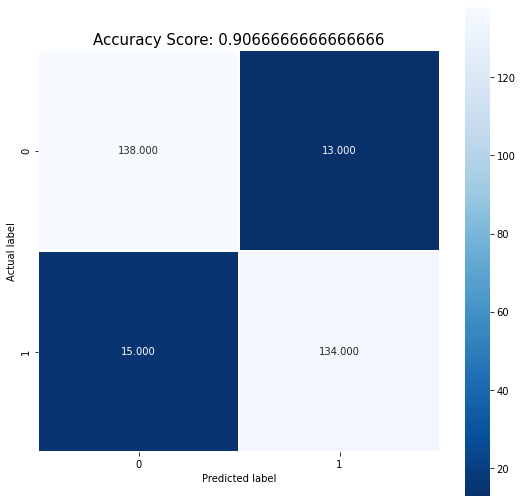

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
# Precision is the ability of a classifier not to label an instance
# positive that is actually negative.What percent of your predictions were correct?
# Recall — What percent of the positive cases did you catch?
#F1 score — What percent of positive predictions were correct?
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
#Recall is the ability of a classifier to find all positive instances.
#Let say your models predicts apples and bananas. If your model avoids making many mistakes (predicting bananas 
#as Apples ) we say the model has high precision. Like wise if your Model avoids making many mistakes predicting
# apple as bananas, than your model has a high recall. You want your model to aim high both for recall and precision
# and avoids as many mistakes as possible. doing a good job of predicting apples and bananas, but what if your model
# good in predicting in one class and bad at other (Let say good precision and bad recall? wouldn’t be misleading 
#to look at precision or recall separately? This is where F1 comes in,it takes in to account both precision and#
 #recall ,balance of the two is where F1 scores on .If your model does a good job predicting Apples and bananas ,
 #Your Model has high F1 score.. However, there are cases where you want to focus on precision or vice versa for example 
 #class A might be aggressive kind of cancer and class B might be no cancer. The stakes of misleading cancer as no cancer or 
 #overlooking the cancer are extremely high therefore you want to your model to avoid mistaking for cancer as 
 #no cancer or mistaking A for B, this means you want to focus on. recall. You don’t want your model to miss the cancer, 
 #you want your model to say i got the cancer, maybe i was to cautious and is taken few no cancer patient for cancer patient but
 # this is preferred than having cancer and saying sorry i missed it.. (e
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       160
           1       0.89      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [34]:
# The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance
# Calculating the acuracy score (y_test vs y_predect)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test, predict))
print(first_trial)

[0.9066666666666666]


# Repeat above steps for K = 5, see what happens with Accuracy

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
predict = knn.predict(X_test)

In [39]:
predict

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [40]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       151
           1       0.91      0.90      0.91       149

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [41]:
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [42]:
# The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance
from sklearn import metrics

In [43]:
score =[]

In [44]:
# Run for k from 1 to 39
# Pssing the value of K to KNeighborsClassifier
# and calculating the acuracy score (y_test vs y_predect)
for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))#append() appends a passed obj (matrics.accuracy) into the existing list.(score)

print(score)

[0.9066666666666666, 0.89, 0.9233333333333333, 0.9166666666666666, 0.9066666666666666, 0.9133333333333333, 0.92, 0.92, 0.9133333333333333, 0.91, 0.9133333333333333, 0.9166666666666666, 0.9166666666666666, 0.91, 0.9133333333333333, 0.9133333333333333, 0.91, 0.91, 0.91, 0.9133333333333333, 0.9133333333333333, 0.91, 0.9133333333333333, 0.9066666666666666, 0.91, 0.91, 0.9133333333333333, 0.9166666666666666, 0.9166666666666666, 0.91, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.92, 0.9166666666666666, 0.9233333333333333, 0.92, 0.92, 0.9166666666666666, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.92, 0.92, 0.9166666666666666, 0.92, 0.92, 0.93, 0.92, 0.9266666666666666, 0.9233333333333333, 0.93, 0.9266666666666666, 0.93, 0.93, 0.93, 0.9266666666666666, 0.93, 0.9233333333333333]


Minimum accuracy:- 0.89 at K = 1
Maximum accuracy:- 0.93 at K = 47


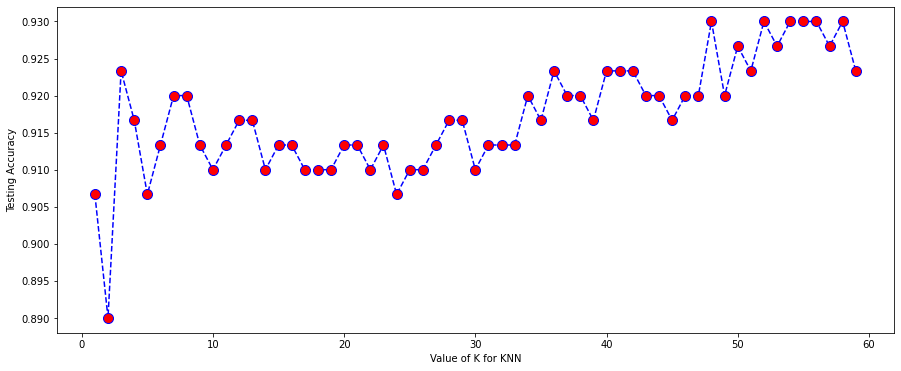

In [52]:
plt.figure(figsize=(15,6))
plt.plot(range(1,60),score, color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
print("Minimum accuracy:-",min(score),"at K =",score.index(min(score)))
print("Maximum accuracy:-",max(score),"at K =",score.index(max(score)))

#Error Rate and K value

In [50]:
error_rate = []
# Might take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))#will return the fraction 
    #of those results who failed to match the test - hence your error.
    #Note that != will return True for those that do not match the test values because you are interested in error.

Minimum error:- 0.07 at K = 47
Maximum error:- 0.11 at K = 1


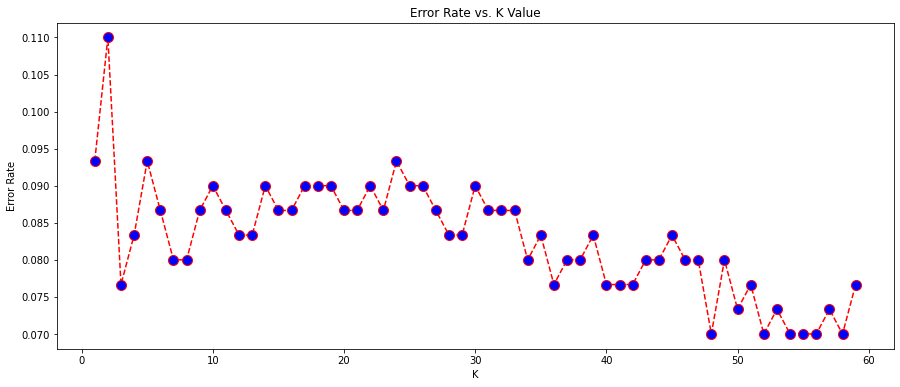

In [51]:
plt.figure(figsize=(15,6))
plt.plot(range(1,60),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate)))


# Conclusion

In [ ]:
#Based on the graphs is plausible to say that a K value of 1 produced the highest error rate and a K value of 47 produced the highest accuracy rate.